TASK 1

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [5]:
image = cv2.imread('images.jpeg')

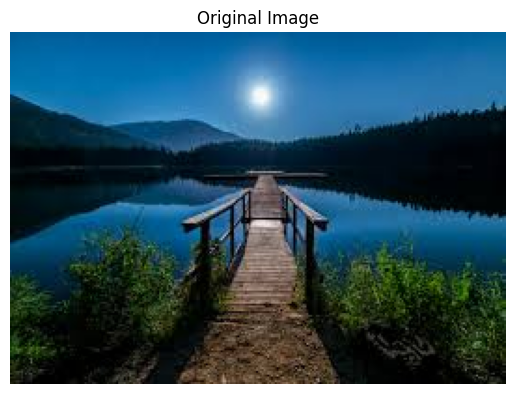

In [6]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')
plt.show()

In [7]:
height, width, channels = image.shape
print(f"Image Size: Width = {width}, Height = {height}, Channels = {channels}")

Image Size: Width = 266, Height = 189, Channels = 3


In [8]:
num_pixels = height * width
print(f"Total Number of Pixels: {num_pixels}")

Total Number of Pixels: 50274


In [9]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2.imwrite('grayscale_image.jpg', gray_image)

True

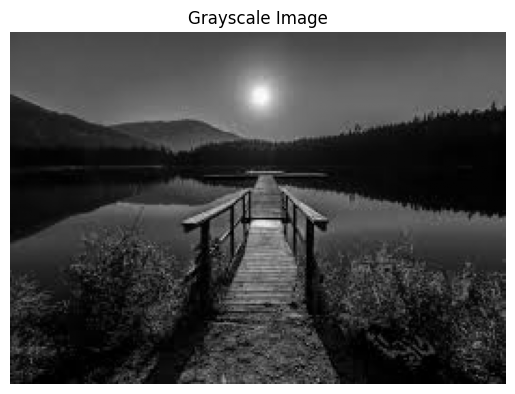

In [10]:
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.show()

In [11]:
threshold_value = 127
_, binary_image = cv2.threshold(gray_image, threshold_value, 255, cv2.THRESH_BINARY)
cv2.imwrite('binary_image.jpg', binary_image)

True

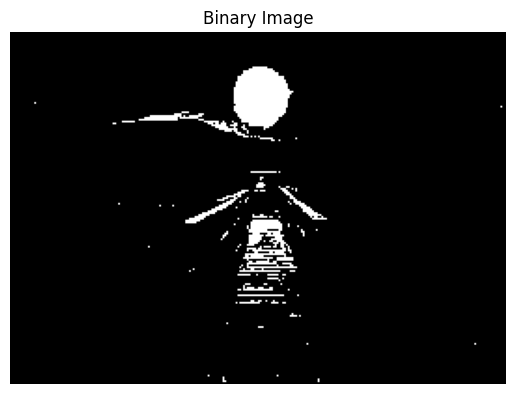

In [12]:
plt.imshow(binary_image, cmap='gray')
plt.title('Binary Image')
plt.axis('off')
plt.show()

In [13]:
black_pixel_count = np.sum(binary_image == 0)
print(f"Number of Black Pixels: {black_pixel_count}")

Number of Black Pixels: 48497


TASK 2

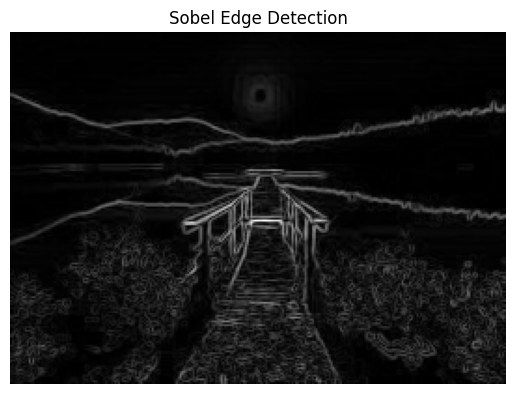

In [14]:
sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)
sobel_edge = cv2.magnitude(sobel_x, sobel_y)
plt.imshow(sobel_edge, cmap='gray')
plt.title('Sobel Edge Detection')
plt.axis('off')
plt.show()


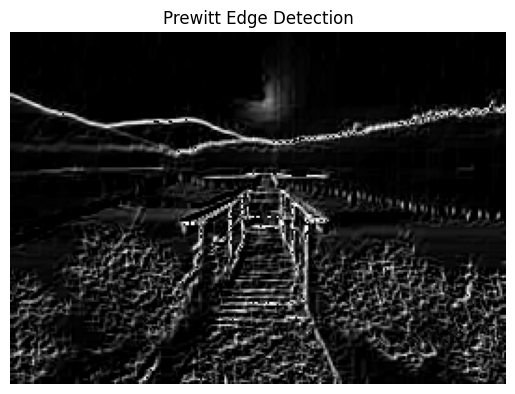

In [15]:
kernelx = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
kernely = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
prewitt_x = cv2.filter2D(gray_image, -1, kernelx)
prewitt_y = cv2.filter2D(gray_image, -1, kernely)
prewitt_edge = prewitt_x + prewitt_y
plt.imshow(prewitt_edge, cmap='gray')
plt.title('Prewitt Edge Detection')
plt.axis('off')
plt.show()


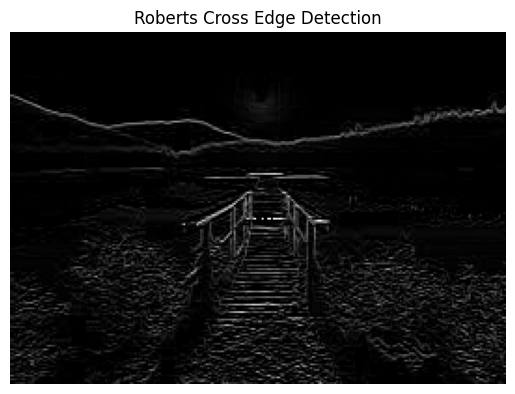

In [16]:
kernel_roberts_x = np.array([[1, 0], [0, -1]])
kernel_roberts_y = np.array([[0, 1], [-1, 0]])
roberts_x = cv2.filter2D(gray_image, -1, kernel_roberts_x)
roberts_y = cv2.filter2D(gray_image, -1, kernel_roberts_y)
roberts_edge = roberts_x + roberts_y
plt.imshow(roberts_edge, cmap='gray')
plt.title('Roberts Cross Edge Detection')
plt.axis('off')
plt.show()


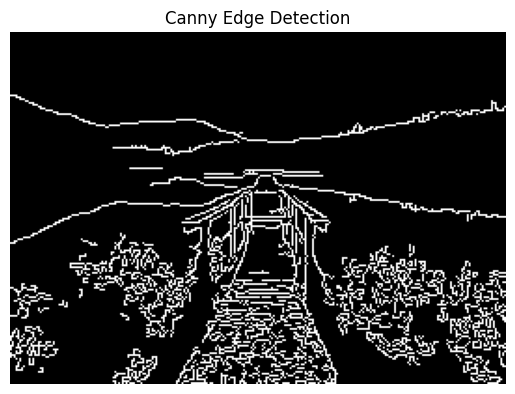

In [17]:
canny_edge = cv2.Canny(gray_image, 100, 200)
plt.imshow(canny_edge, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis('off')
plt.show()


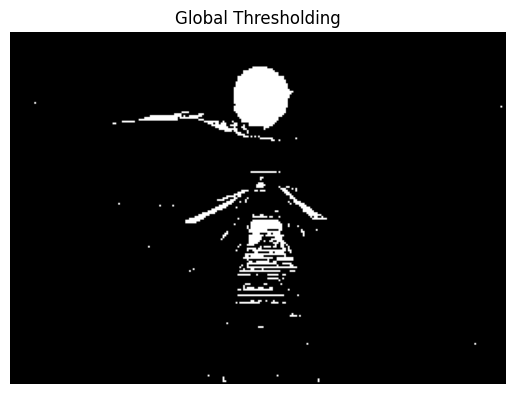

In [18]:
_, global_thresh = cv2.threshold(gray_image, threshold_value, 255, cv2.THRESH_BINARY)
plt.imshow(global_thresh, cmap='gray')
plt.title('Global Thresholding')
plt.axis('off')
plt.show()


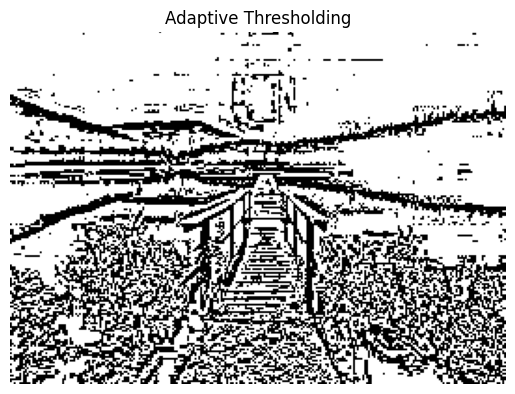

In [19]:
adaptive_thresh = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                        cv2.THRESH_BINARY, 11, 2)
plt.imshow(adaptive_thresh, cmap='gray')
plt.title('Adaptive Thresholding')
plt.axis('off')
plt.show()


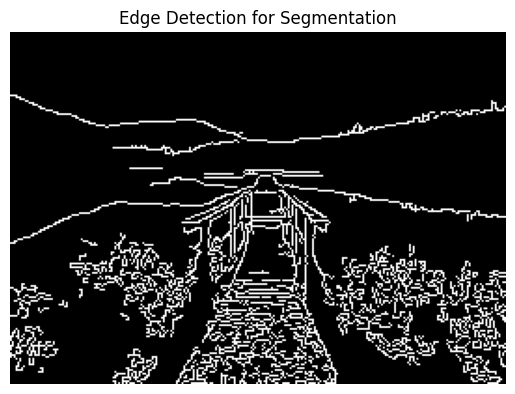

In [20]:
plt.imshow(canny_edge, cmap='gray')
plt.title('Edge Detection for Segmentation')
plt.axis('off')
plt.show()


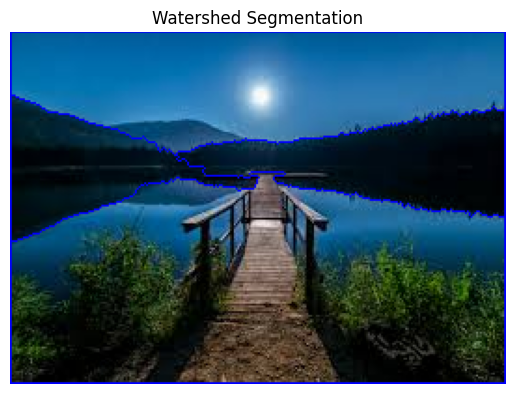

In [21]:
ret, binary = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
kernel = np.ones((3, 3), np.uint8)
sure_bg = cv2.dilate(binary, kernel, iterations=2)
dist_transform = cv2.distanceTransform(binary, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)
markers = cv2.connectedComponents(sure_fg)[1]
markers = markers + 1
markers[unknown == 255] = 0
watershed_image = cv2.watershed(image, markers)
image[watershed_image == -1] = [255, 0, 0]
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Watershed Segmentation')
plt.axis('off')
plt.show()
